Obter base de dados

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# ID do arquivo no Google Drive
file_id = "1DcS1VgGGVa5O6JHuD7ZeKmxgI1ejCw4m"

In [ ]:
# URL para download do arquivo usando o ID
url = f"https://drive.google.com/uc?id={file_id}"

In [ ]:
# Ler o arquivo CSV diretamente do Google Drive
dados = pd.read_csv(url)

Importação e Limpeza

In [ ]:
# Visualizar as primeiras linhas do DataFrame para entender a estrutura dos dados
print("Antes da limpeza:")
print(dados.head())

Antes da limpeza:
              address      district  area  bedrooms  garage  \
0          Rua Herval    Belenzinho    21         1       0   
1  Avenida São Miguel  Vila Marieta    15         1       1   
2    Rua Oscar Freire     Pinheiros    18         1       0   
3    Rua Júlio Sayago       Vila Ré    56         2       2   
4  Rua Barata Ribeiro    Bela Vista    19         1       0   

                 type  rent  total  
0     Studio e kitnet  2400   2939  
1     Studio e kitnet  1030   1345  
2         Apartamento  4000   4661  
3  Casa em condomínio  1750   1954  
4     Studio e kitnet  4000   4654  


In [ ]:
# Verificar se há valores ausentes
print("\nValores ausentes antes da limpeza:")
print(dados.isnull().sum())


Valores ausentes antes da limpeza:
address     0
district    0
area        0
bedrooms    0
garage      0
type        0
rent        0
total       0
dtype: int64


In [ ]:
# Preencher valores ausentes nas colunas não numéricas com uma string vazia
dados = dados.fillna('')

In [ ]:
# Dicionário com valores específicos para preencher em cada coluna não numérica
valores_preenchimento = {'endereco': 'endereco_desconhecido', 'bairro': 'bairro_desconhecido', 'tipo': 'tipo_desconhecido'}

In [ ]:
# Preencher valores específicos nas colunas não numéricas
dados = dados.fillna(valores_preenchimento)

In [ ]:
# Visualizar as primeiras linhas do DataFrame após limpeza
print("\nDepois da limpeza:")
print(dados.head())


Depois da limpeza:
              address      district  area  bedrooms  garage  \
0          Rua Herval    Belenzinho    21         1       0   
1  Avenida São Miguel  Vila Marieta    15         1       1   
2    Rua Oscar Freire     Pinheiros    18         1       0   
3    Rua Júlio Sayago       Vila Ré    56         2       2   
4  Rua Barata Ribeiro    Bela Vista    19         1       0   

                 type  rent  total  
0     Studio e kitnet  2400   2939  
1     Studio e kitnet  1030   1345  
2         Apartamento  4000   4661  
3  Casa em condomínio  1750   1954  
4     Studio e kitnet  4000   4654  


Análise Descritiva

In [ ]:
# Análise 1: Aluguel
media_aluguel = dados['rent'].mean()
mediana_aluguel = dados['rent'].median()
desvio_padrao_aluguel = dados['rent'].std()

print(f"Média do aluguel: {media_aluguel:.2f}")
print(f"Mediana do aluguel: {mediana_aluguel:.2f}")
print(f"Desvio padrão do aluguel: {desvio_padrao_aluguel:.2f}")

Média do aluguel: 3250.81
Mediana do aluguel: 2415.00
Desvio padrão do aluguel: 2650.71


In [ ]:
# Análise 2: Tipos de imóveis
contagem_tipos = dados['type'].value_counts()
print("\nContagem de tipos de imóveis:")
print(contagem_tipos)


Contagem de tipos de imóveis:
type
Apartamento           7194
Casa                  2841
Studio e kitnet       1381
Casa em condomínio     241
Name: count, dtype: int64


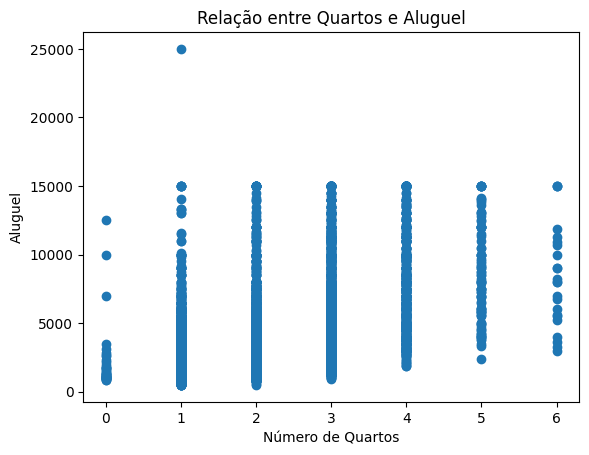

In [ ]:
# Análise 3: Relação entre quartos e aluguel
plt.scatter(dados['bedrooms'], dados['rent'])
plt.xlabel("Número de Quartos")
plt.ylabel("Aluguel")
plt.title("Relação entre Quartos e Aluguel")
plt.show()

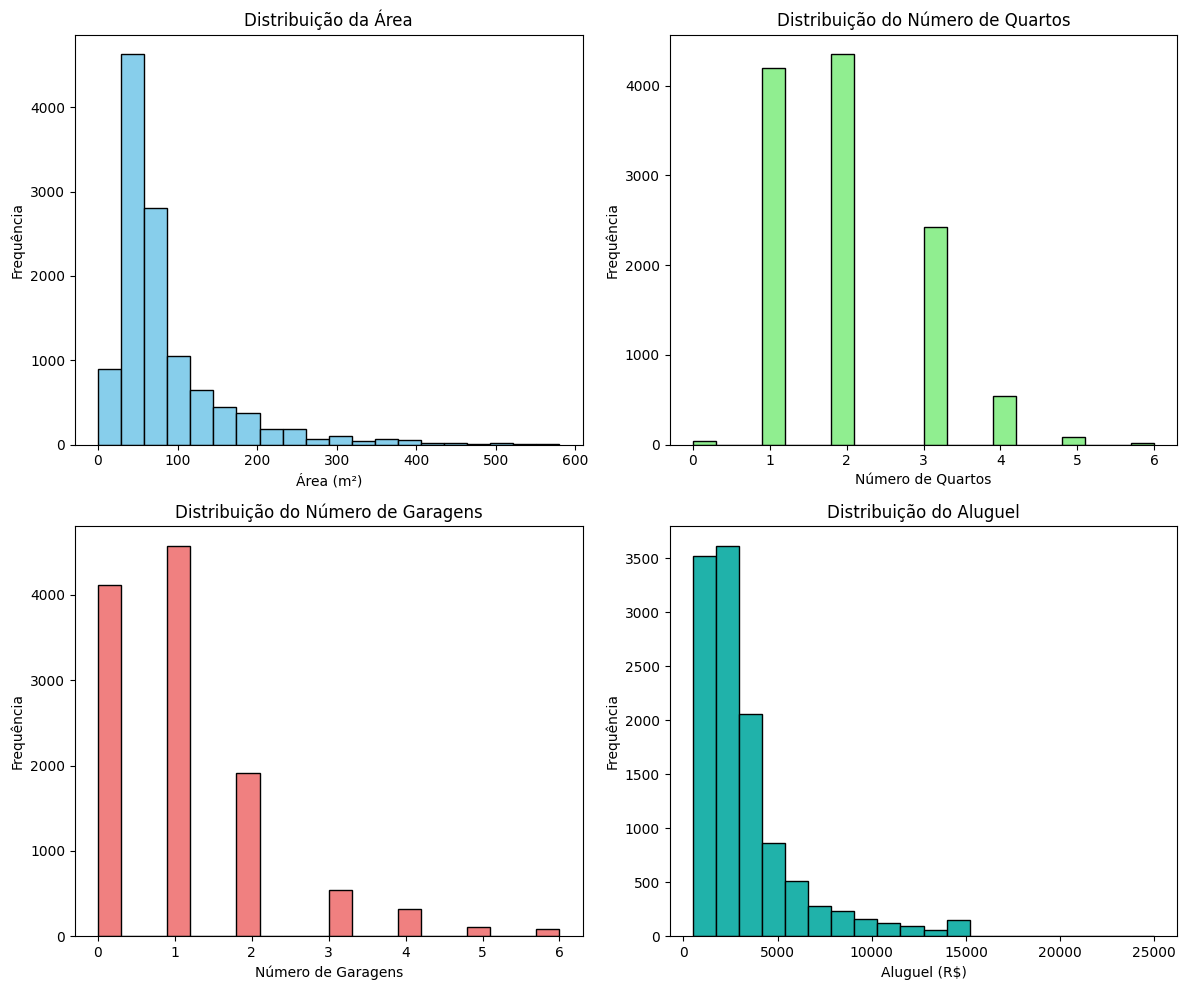

In [ ]:
# Plotar histogramas para variáveis numéricas
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

axs[0, 0].hist(dados['area'], bins=20, color='skyblue', edgecolor='black')
axs[0, 0].set_title('Distribuição da Área')
axs[0, 0].set_xlabel('Área (m²)')
axs[0, 0].set_ylabel('Frequência')

axs[0, 1].hist(dados['bedrooms'], bins=20, color='lightgreen', edgecolor='black')
axs[0, 1].set_title('Distribuição do Número de Quartos')
axs[0, 1].set_xlabel('Número de Quartos')
axs[0, 1].set_ylabel('Frequência')

axs[1, 0].hist(dados['garage'], bins=20, color='lightcoral', edgecolor='black')
axs[1, 0].set_title('Distribuição do Número de Garagens')
axs[1, 0].set_xlabel('Número de Garagens')
axs[1, 0].set_ylabel('Frequência')

axs[1, 1].hist(dados['rent'], bins=20, color='lightseagreen', edgecolor='black')
axs[1, 1].set_title('Distribuição do Aluguel')
axs[1, 1].set_xlabel('Aluguel (R$)')
axs[1, 1].set_ylabel('Frequência')

plt.tight_layout()
plt.show()


Modelagem de Regressão Linear

Visualização de Dados